<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/AI_TF_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Keras Classifiers**


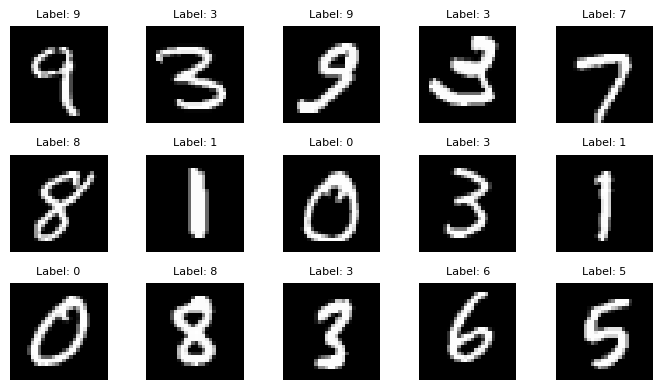

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Carrega o dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Seleciona 15 imagens aleatórias
import random
indices = random.sample(range(x_train.shape[0]), 15)
images = x_train[indices]
labels = y_train[indices]

fig, axes = plt.subplots(3, 5, figsize=(7,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {labels[i]}",fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()


# Keras MLP - Multi-Layer Perceptron

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8608 - loss: 0.4807 - val_accuracy: 0.9576 - val_loss: 0.1435
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9547 - loss: 0.1509 - val_accuracy: 0.9675 - val_loss: 0.1044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9675 - loss: 0.1075 - val_accuracy: 0.9736 - val_loss: 0.0838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9736 - loss: 0.0868 - val_accuracy: 0.9746 - val_loss: 0.0833
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9779 - loss: 0.0701 - val_accuracy: 0.9762 - val_loss: 0.0722


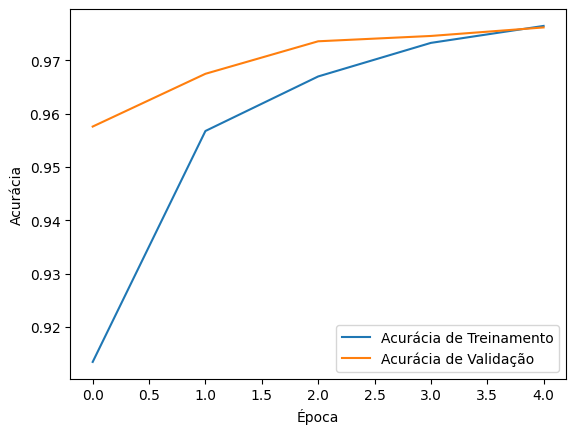

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Carrega o dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normaliza os dados de entrada
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Lineariza as imagens
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Define o modelo
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treina o modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plota o gráfico do treinamento
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()


## Evaluation

In [8]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


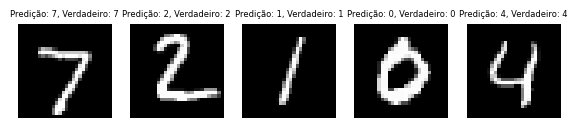

In [9]:
# Faz predições para algumas instâncias
predictions = model.predict(x_test[:5])

plt.figure(figsize=(7,2))

# Exibe as predições
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    # print(f"Predição {i+1}: {predicted_label} (verdadeiro: {true_label})")

    # Exibe a imagem
    ax = plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predição: {predicted_label}, Verdadeiro: {true_label}",fontsize=6)
    plt.axis("off")

plt.show()



# Keras ConvNet

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9007 - loss: 0.3483 - val_accuracy: 0.9813 - val_loss: 0.0541
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9814 - loss: 0.0603 - val_accuracy: 0.9864 - val_loss: 0.0417
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9881 - val_loss: 0.0391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9855 - val_loss: 0.0405
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9893 - val_loss: 0.0324


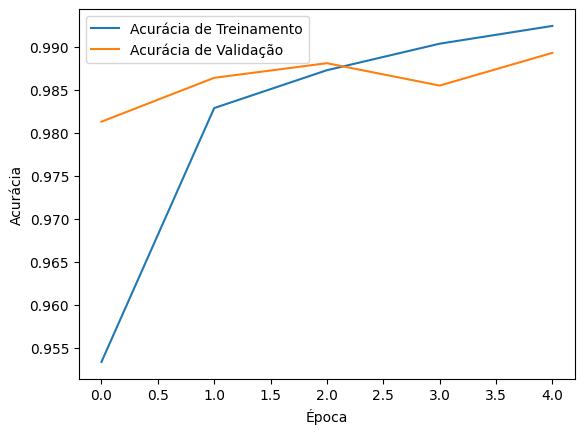

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


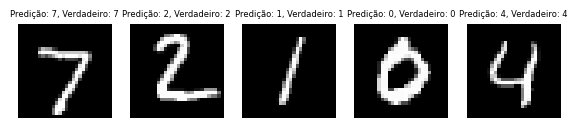

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Carrega o dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normaliza os dados de entrada
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Adiciona uma dimensão para o canal (convoluções esperam imagens com 3 dimensões)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Define o modelo convolucional
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treina o modelo
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plota o gráfico do treinamento
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Avalia o modelo
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_labels))

# Faz predições para algumas instâncias e exibe as imagens
predictions = model.predict(x_test[:5])
plt.figure(figsize=(7,2))
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    ax = plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predição: {predicted_label}, Verdadeiro: {true_label}",fontsize=6)
    plt.axis("off")
plt.show()


# Image Convolutions

Acesse: https://cs231n.github.io/convolutional-networks/

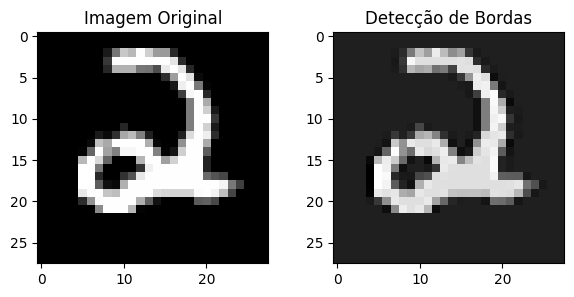

In [26]:
# 1. Escolher um dígito aleatório para visualização
image_index = np.random.randint(0, len(x_test))
image = x_test[image_index]

# 2. Definir o kernel de detecção de bordas (Sobel)
edge_detection_kernel = np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]])

# 3. Formatar a imagem e o kernel para convolução
# Converte para float32
image = image.astype(np.float32)
edge_detection_kernel = edge_detection_kernel.astype(np.float32)

# Adiciona dimensões de batch e canais
image = np.expand_dims(image, axis=0) # (1, 28, 28)
image = np.expand_dims(image, axis=-1) # (1, 28, 28, 1)
edge_detection_kernel = np.expand_dims(edge_detection_kernel, axis=-1) # (3, 3, 1)
edge_detection_kernel = np.expand_dims(edge_detection_kernel, axis=-1) # (3, 3, 1, 1)

# 4. Convolução usando tf.nn.conv2d
convolved_image = tf.nn.conv2d(
    image,
    edge_detection_kernel,
    strides=1,
    padding='SAME'  # Manter o tamanho da saída igual à entrada
)

# 5. Visualizar a imagem original e o resultado da convolução
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap='gray') # Remove as dimensões extras para plotar
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(convolved_image), cmap='gray') # Remove as dimensões extras para plotar
plt.title("Detecção de Bordas")

plt.show()

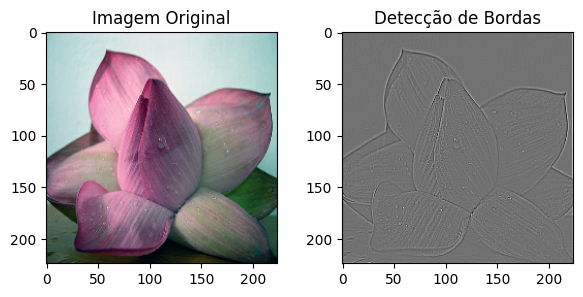

In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os

# 1. Carregar uma imagem de exemplo do dataset de flores
data_dir = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
data_dir = pathlib.Path(data_dir)

# Obter a lista de todas as imagens (roses)
root = '/root/.keras/datasets/flower_photos/flower_photos/roses'
image_files = os.listdir(root)

# Escolher uma imagem aleatória
image_path = str(np.random.choice(image_files))

# 2. Carregar e pré-processar a imagem
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3) # Decodifica como JPEG (3 canais de cor)
    image = tf.image.convert_image_dtype(image, tf.float32) # Converte para float32 e normaliza para [0, 1]
    image = tf.image.resize(image, [224, 224]) # Redimensiona para um tamanho fixo (opcional, mas recomendado)
    return image

image = load_and_preprocess_image(os.path.join(root,image_path))

# 3. Definir o kernel de detecção de bordas (Sobel)
edge_detection_kernel = np.array([[-1, -1, -1],
                                    [-1,  8, -1],
                                    [-1, -1, -1]])

# 4. Formatar a imagem e o kernel para convolução
# Converte para numpy array e garante que seja float32
image = image.numpy().astype(np.float32)
edge_detection_kernel = edge_detection_kernel.astype(np.float32)

# Adiciona dimensões de batch
image = np.expand_dims(image, axis=0) # (1, 224, 224, 3)
edge_detection_kernel = np.expand_dims(edge_detection_kernel, axis=-1) # (3, 3, 1)
edge_detection_kernel = np.expand_dims(edge_detection_kernel, axis=-1) # (3, 3, 1, 1)

# Repete o kernel para que corresponda ao número de canais de entrada (RGB)
edge_detection_kernel = np.repeat(edge_detection_kernel, 3, axis=2)  # (3, 3, 3, 1)

# 5. Convolução usando tf.nn.conv2d
convolved_image = tf.nn.conv2d(
    image,
    edge_detection_kernel,
    strides=1,
    padding='SAME'
)

# 6. Visualizar a imagem original e o resultado da convolução
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(convolved_image), cmap='gray')
plt.title("Detecção de Bordas")

plt.show()

## MaxPooling2D e Padding

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

# Imagem de entrada de exemplo (batch_size, height, width, channels)
input_shape = (1, 28, 28, 1)
input_tensor = tf.random.normal(input_shape)

# Camada convolucional sem padding
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')
output_tensor = conv_layer(input_tensor)

print("Input shape:", input_tensor.shape)    # Output: Input shape: (1, 28, 28, 1)
print("Output shape:", output_tensor.shape)  # Output: Output shape: (1, 28, 28, 32)  (height e width permanecem os mesmos)

# Camada convolucional com padding 'same'
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')
output_tensor = conv_layer(input_tensor)

print("Input shape:", input_tensor.shape)    # Output: Input shape: (1, 28, 28, 1)
print("Output shape:", output_tensor.shape)


Input shape: (1, 28, 28, 1)
Output shape: (1, 26, 26, 32)
Input shape: (1, 28, 28, 1)
Output shape: (1, 28, 28, 32)


In [3]:
from tensorflow.keras.layers import MaxPooling2D

# Camada de max pooling com padding 'same'
pooling_layer = MaxPooling2D(pool_size=(2, 2), padding='same')
output_tensor = pooling_layer(input_tensor)

print("Input shape:", input_tensor.shape)    # Output: Input shape: (1, 28, 28, 1)
print("Output shape:", output_tensor.shape)  # Output: Output shape: (1, 14, 14, 1)  (height e width são reduzidos, mas o padding ajuda a manter a divisibilidade)


Input shape: (1, 28, 28, 1)
Output shape: (1, 14, 14, 1)
